Importing required libraries

In [1]:
import matplotlib.pyplot as plt   #for creating visualizations, tables
import cv2    #used for computer vision tasks like image processing
import numpy as np    #used for working with arrays
from keras.models import Sequential   #Sequential model is a linear stack of layers
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam   #SGD (Stochastic Gradient Descent) and Adam are both optimization algorithms commonly used in training neural networks.
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping   #callbacks stop training when metric(like learning rate) has stopped improving
from tensorflow.keras.utils import to_categorical   #is a utility function used to convert integer class labels to one-hot encoded vectors(labels to binary format)
import pandas as pd   #library for data manupulation and analysis
from sklearn.model_selection import train_test_split    #Scikit-learn is a popular Python library for machine learning. It provides simple and efficient tools for data mining and data analysis
from sklearn.utils import shuffle   #to randomly shuffle data
from tqdm import tqdm_notebook    #library that adds a progress bar to iterables, allowing you to monitor the progress of loops.

Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading Dataset from Drive

In [ ]:
data_path = '/content/drive/MyDrive/A_Z Handwritten Data'
data = pd.read_csv(data_path +'/A_Z Handwritten Data.csv', header = None).astype('float32')
print(data.head(10))

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0 

Splitting data into X and y where X will contain a character image and y will contain a label of that image.

In [ ]:
X = data.drop([0],axis = 1)
y = data[0]

Splitting and reshaping training and testing data

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74491, 28, 28)


Creating words dictionary

In [ ]:
word_dict={0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

Again reshaping data so that it can be used for training of model

In [ ]:
train_X = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)


New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74491, 28, 28, 1)


Converting single float values to categorical values using to_categorical method from keras

In [ ]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)


New shape of train labels:  (297960, 26)
New shape of test labels:  (74491, 26)


Creating CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation = 'relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense (64, activation ="relu"))
model.add(Dense (128, activation ="relu"))

model.add(Dense (26, activation ="softmax"))

model.compile(optimizer = Adam (learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau (monitor = 'val_loss', factor= 0.2, patience=1, min_lr = 8.0001)
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 2, verbose=0, mode='auto')

history = model.fit(train_X, train_yOHE, epochs=10, validation_data = (test_X, test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 378s 40ms/step - loss: 0.1708 - accuracy: 0.9538 - val_loss: 0.0879 - val_accuracy: 0.9753
Epoch 2/10
9312/9312 [==============================] - 381s 41ms/step - loss: 0.0756 - accuracy: 0.9790 - val_loss: 0.0716 - val_accuracy: 0.9803
Epoch 3/10
9312/9312 [==============================] - 370s 40ms/step - loss: 0.0634 - accuracy: 0.9824 - val_loss: 0.0658 - val_accuracy: 0.9836
Epoch 4/10
9312/9312 [==============================] - 365s 39ms/step - loss: 0.0578 - accuracy: 0.9843 - val_loss: 0.0524 - val_accuracy: 0.9861
Epoch 5/10
9312/9312 [==============================] - 381s 41ms/step - loss: 0.0538 - accuracy: 0.9856 - val_loss: 0.0627 - val_accuracy: 0.9839
Epoch 6/10
9312/9312 [==============================] - 382s 41ms/step - loss: 0.0520 - accuracy: 0.9861 - val_loss: 0.0643 - val_accuracy: 0.9832
Epoch 7/10
9312/9312 [==============================] - 373s 40ms/step - loss: 0.0506 - accuracy: 0.9869 - val_loss: 0

Model Summary

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 128)        

Saving Model to Google Drive

In [ ]:
model.save(r'/content/drive/MyDrive/A_Z Handwritten Data/model_v0')

Evaluating the model

In [ ]:
scores = model.evaluate(test_X, test_yOHE, verbose=0)
print("Accuracy:%.2f%%" % (scores[1]*100))

Accuracy:97.46%


Plotting training & validation accuracy values

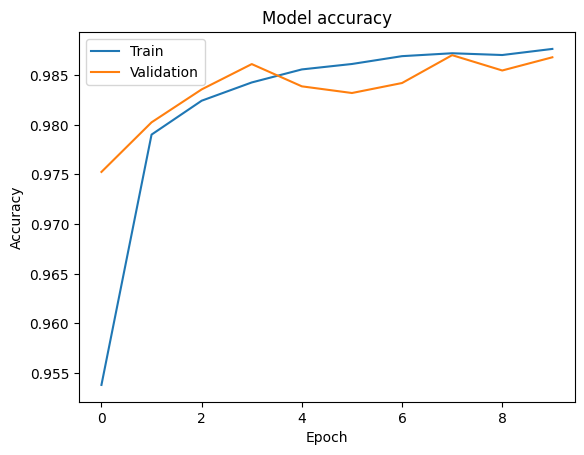

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Plotting training & validation loss values

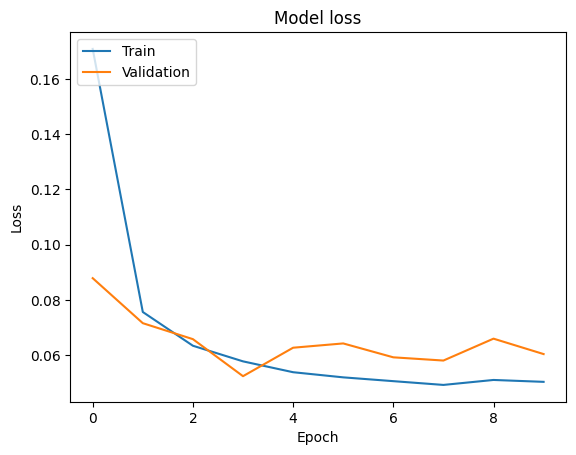

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Predicting characters in images from testing data

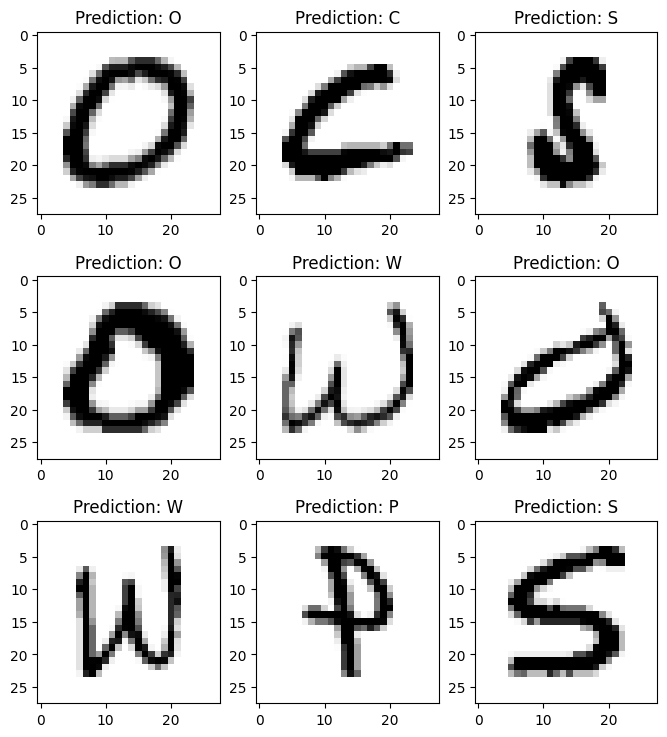

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")

    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)


Let's visualize the model on customized images:

1/1 [==============================] - 0s 481ms/step


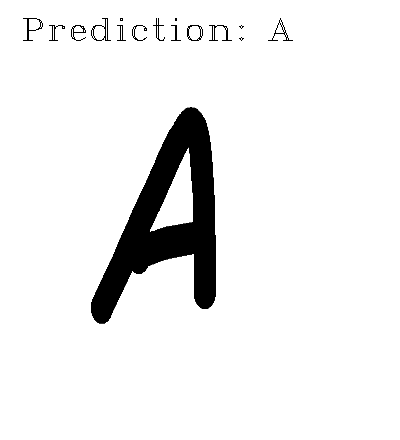

In [3]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/A_Z Handwritten Data/model_v0')
word_dict={0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}
from google.colab.patches import cv2_imshow

img = cv2.imread(r'/content/drive/MyDrive/A_Z Handwritten Data/testA.png')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))
img_copy = cv2.GaussianBlur(img_copy,(7,7),0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_threshold = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_threshold, (28,28))
img_final = np.reshape(img_final, (1, 28, 28, 1))
img_predict = word_dict[np.argmax(model.predict(img_final))]
window_name='image'
cv2.putText(img, "Prediction: " + img_predict, (20,40), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.7, color = (0,0,0))
cv2_imshow(img)

cv2.waitKey(0)

cv2.destroyAllWindows()